In [1]:
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt

In [2]:
# test values
x = [1,2,3]
y = [2,3,4]


In [3]:
def compute_slope_estimator(x_vals,y_vals):
    n = len(x_vals)
    mean_x = np.mean(x_vals)
    mean_y = np.mean(y_vals)
    top = np.dot(x_vals, y_vals) - n*mean_x*mean_y
    bottom = np.dot(x_vals, x) - n*mean_x*mean_x
    return top / bottom

In [4]:
compute_slope_estimator(x, y)

1.0

In [5]:
#Problem 2
def compute_intercept_estimator(x_vals,y_vals):
    n = len(x_vals)
    mean_x = np.mean(x_vals)
    mean_y = np.mean(y_vals)
    a = compute_slope_estimator(x_vals, y_vals)
    return mean_y - a * mean_x

In [6]:
compute_intercept_estimator(x, y)

1.0

In [7]:
#Problem 3
def train_model(x_vals,y_vals):
    a = compute_slope_estimator(x_vals, y_vals)
    b = compute_intercept_estimator(x_vals, y_vals)
    return (a,b)

In [8]:
train_model(x,y)

(1.0, 1.0)

In [9]:
#Problem 4
def dL_da(x_vals,y_vals,a,b):
    n = len(x_vals)
    d = np.sum(2*(y_vals-a*x_vals-b)*(-x_vals))
    return 1/n*d

In [9]:
#Problem 5
def dL_db(x_vals,y_vals,a,b):
    n = len(x_vals)
    d = np.sum(2*(y_vals-a*x_vals-b)*(-1))
    return 1/n*d

In [10]:
#Problem 6
def gradient_descent_step(x_vals,y_vals,a,b,k=0.01):
    n = len(x_vals)
    a_updated = a - k/n * dL_da(x_vals, y_vals, a, b)
    b_updated = b - k/n * dL_db(x_vals, y_vals, a, b)
    return (a_updated, b_updated)

In [11]:
#Problem 7
def gradient_descent(x_vals,y_vals,a_0=0,b_0=0,k=1000):
    a_k = a_0
    b_k = b_0
    for i in range(k):
        a_k, b_k = gradient_descent_step(x_vals, y_vals, a_0, b_0)
    return (a_k, b_k)

In [12]:
# Problem 8
def fit_quadratic(x_vals, y_vals):
    n = len(x_vals)
    x_sq = np.square(x_vals)
    a = compute_slope_estimator(x_sq, y_vals)
    b = compute_intercept_estimator(x_sq, y_vals)
    return (a, b)

In [11]:
# Problem 9
def calculate_scaling_parameters(d_vals, l_vals):
    log_d = np.log2(d_vals)
    a, b = np.polyfit(log_d, l_vals, 1)
    return (a, b)

In [12]:
## Additional functions

def generate_y_vals(x_vals, a=1, b=0, std_dev=0, f=lambda x: x, g_inverse=lambda y: y):
    """
    Generates noisy output data where g(y) has a linear relationship with f(x).

    Parameters:
    x_vals (numpy array): The observed values of the independent variable x.
    a (float): Scaling factor applied to f(x). Default is 1.
    b (float): Bias or intercept term added to a*f(x). Default is 0.
    std_dev (float): Standard deviation of the normally distributed noise added to a*f(x)+b. Default is 0 (no noise).
    f (function): Transformation applied to x. Default is the identity function (no transformation).
    g_inverse (function): The inverse of the transformation applied to y. Default is the identity function (no transformation).

    Returns:
    y_vals (numpy array): The noisy observed output values.
    """
    # Number of observations (length of the input array x_obs)
    n = len(x_vals)

    # Generate normally distributed noise with mean 0 and standard deviation `std_dev`
    errors = np.random.normal(0, std_dev, size=n)

    # Compute the output y using the formula: y = g_inverse(a * f(x) + b + errors)
    y_vals = g_inverse(a * f(x_vals) + b + errors)

    return y_vals

In [13]:
def plot_generated_data(x_vals, y_vals, scaled=False, f=lambda x: x, g=lambda y: y):
    """
    Plots the data, either transformed (if scaled=True) or untransformed (if scaled=False),
    allowing a linear relationship to be visualized when transformations are applied.

    Parameters:
    x_vals (numpy array): The observed values of the independent variable x.
    y_vals (numpy array): The observed values of the dependent variable y.
    scaled (bool): If True, plot the transformed data (f(x) vs g(y)), otherwise plot untransformed data (x vs y).
    f (function): Transformation applied to x. Default is the identity function (no transformation).
    g (function): Transformation applied to y. Default is the identity function (no transformation).
    """
    if scaled:
        # Apply the transformations f(x) and g(y)
        transformed_x = f(x_vals)
        transformed_y = g(y_vals)
        xlabel = 'f(x)'
        ylabel = 'g(y)'
        title = 'Transformed data: g(y) vs f(x)'
    else:
        # Use untransformed data
        transformed_x = x_vals
        transformed_y = y_vals
        xlabel = 'x'
        ylabel = 'y'
        title = 'Original data: y vs x'

    # Create the plot
    plt.figure(figsize=(8, 6))
    plt.scatter(transformed_x, transformed_y, label='Data', color='b', s=10)

    # Add labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # Display the plot
    plt.show()

In [14]:
## Example values for Problem 9

# number of training tokens
d_vals = [2 ** i for i in range(24,34)]
# cross-entropy loss for each model in the example
l_vals = [4.00, 3.95, 3.55, 3.43, 3.12, 3.00, 2.79, 2.50, 2.35, 2.22]

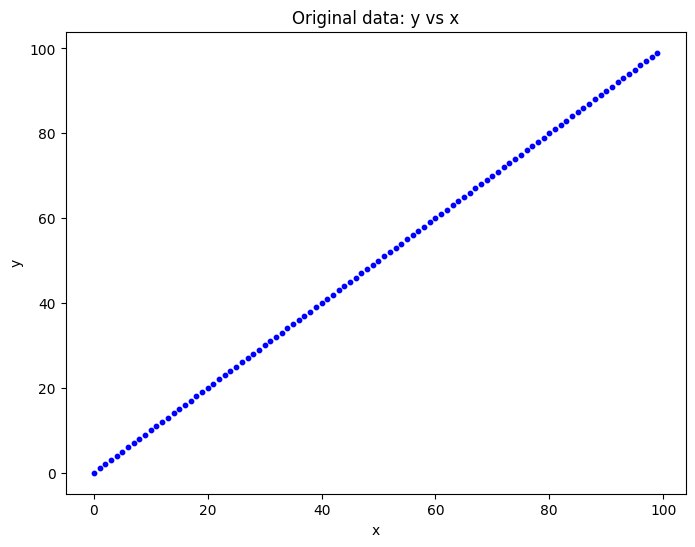

In [18]:
x = np.arange(100)
random_y = generate_y_vals(x)
plot_generated_data(x, random_y)